In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import plotly.graph_objects as gr
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
from sympy import *

In [2]:
def heaviside(x1):
    return 1*(x1>0)

def phi_1(x1):
    return heaviside(x1-1)*heaviside(2-x1)
def a1(u=1):
    return 1
def f1(u):
    return a1()*u

def phi_2(x1):
    return math.pow(math.sin(3.14*x1/2),2)*heaviside(x1)*heaviside(2-x1)
def a2(u):
    return u
def f2(u):
    return u*u/2

def phi_3(x):
    return heaviside(x)*heaviside(8/15-x)*x +heaviside(x-8/15-1e-5)*heaviside(24/15-x)*(-x + 16/15) +\
        heaviside(x-24/15-1e-5)*heaviside(32/15-x-1e-5)*(x-32/15)
def a3(u):
    return 1/(u+1)
def f3(u):
    return math.log(u+1)

In [19]:
x0 = 5
u1 = 3
u2 = 7

In [20]:
def phi_dop(x):
    return heaviside(x)*heaviside(x0-x)*u1 + heaviside(x - x0)*u2 
    
def a_dop(u):
    return 1 / (u**2 + 1)
def f_dop(u):
    return math.atan(u)

In [21]:
def Kurant_condition(layer, h, a, c=0.9):
    a_max = max([a(u) for u in layer])
    T = c * h / a_max

    return T

def solution(phi,a,f):
    u = []
    h=0.01
    x_plot = np.linspace(0, 10, 1000)
    u0 = [phi(i) for i in x_plot]
    u.append(u0)

    ti=0
    t_end=1
    while ti<t_end:
        T=Kurant_condition(u[-1],h,a)
        u01 = []
        u01.append(0)
        for i in range(1,len(x_plot)-1):
            u01.append((u[-1][i+1]+u[-1][i-1])/2-T*(f(u[-1][i+1])-f(u[-1][i-1]))/(2*h))
        u01.append(0)
        u.append(u01)
        ti=ti+T
    return u


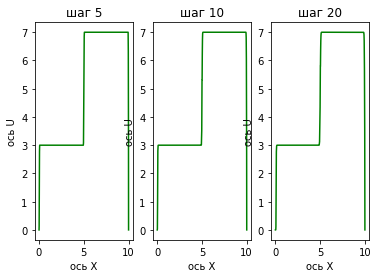

In [22]:
A1=solution(phi_1,a1,f1)
A2=solution(phi_2,a2,f2)
A3=solution(phi_3,a3,f3)
A_dop = solution(phi_dop, a_dop, f_dop)

h=0.01
x_plot = np.linspace(0, 10, 1000)

fig = plt.figure()
ax = fig.add_subplot(1,3,1)
ax.plot(x_plot, A_dop[5], color="green")
ax.set_title('шаг 5')
ax.set_xlabel('ось X')
ax.set_ylabel('ось U')

ax1 = fig.add_subplot(1,3,2)
ax1.plot(x_plot, A_dop[10], color="green")
ax1.set_title('шаг 10')
ax1.set_xlabel('ось X')
ax1.set_ylabel('ось U')

ax2 = fig.add_subplot(1,3,3)
ax2.plot(x_plot, A_dop[20], color="green")
ax2.set_title('шаг 20')
ax2.set_xlabel('ось X')
ax2.set_ylabel('ось U')

# ax3 = fig.add_subplot(1,6,4)
# ax3.plot(x_plot, A_dop[40], color="green")
# ax3.set_title('шаг 40')
# ax3.set_xlabel('ось X')
# ax3.set_ylabel('ось U')

# ax3 = fig.add_subplot(1,6,5)
# ax3.plot(x_plot, A_dop[80], color="green")
# ax3.set_title('шаг 80')
# ax3.set_xlabel('ось X')
# ax3.set_ylabel('ось U')

# ax3 = fig.add_subplot(1,6,6)
# ax3.plot(x_plot, A_dop[10], color="green")
# ax3.set_title('шаг 100')
# ax3.set_xlabel('ось X')
# ax3.set_ylabel('ось U')

plt.show()